In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [3]:
df = pd.read_excel('travel_inbound.xlsx',sheet_name = 'T1', index_col=0, header=0, skiprows = 10)
df = df.iloc[:62] # Select rows from 0 to 61 (inclusive). Include all columns.
df_transposed = df.transpose() # Transpose the DataFrame 
df_transposed.columns = df_transposed.columns.str.strip()
#rename and Convert the index to datetime format and extract the year.
df_transposed.rename(columns={'Total International Visitor Arrivals By Inbound Tourism Markets': 'Total'},inplace=True)
df_transposed.index = pd.to_datetime(df_transposed.index, format='%Y %b')
df_transposed.sort_index(inplace=True)
df_analyze = df_transposed.loc['2008-01-01':] # Extract Time Period from 2008 onward
print(df_analyze.isnull().sum())

Data Series
Total                      0
Southeast Asia             0
Brunei Darussalam          0
Indonesia                  0
Malaysia                   0
                          ..
Egypt                      0
Mauritius                  0
South Africa (Rep Of)      0
Other Markets In Africa    0
Others                     0
Length: 62, dtype: int64


after we check the situation about regions, we are further curious about countries.

1. Which country within the top three regions have the most visitors to Singapore? 

2. we assume it is Malaysia because of the convenient transportation and close national ties between the two countries.

so we calculated the percentage of arrivals to Singapore by country each year, plotting a area chart.

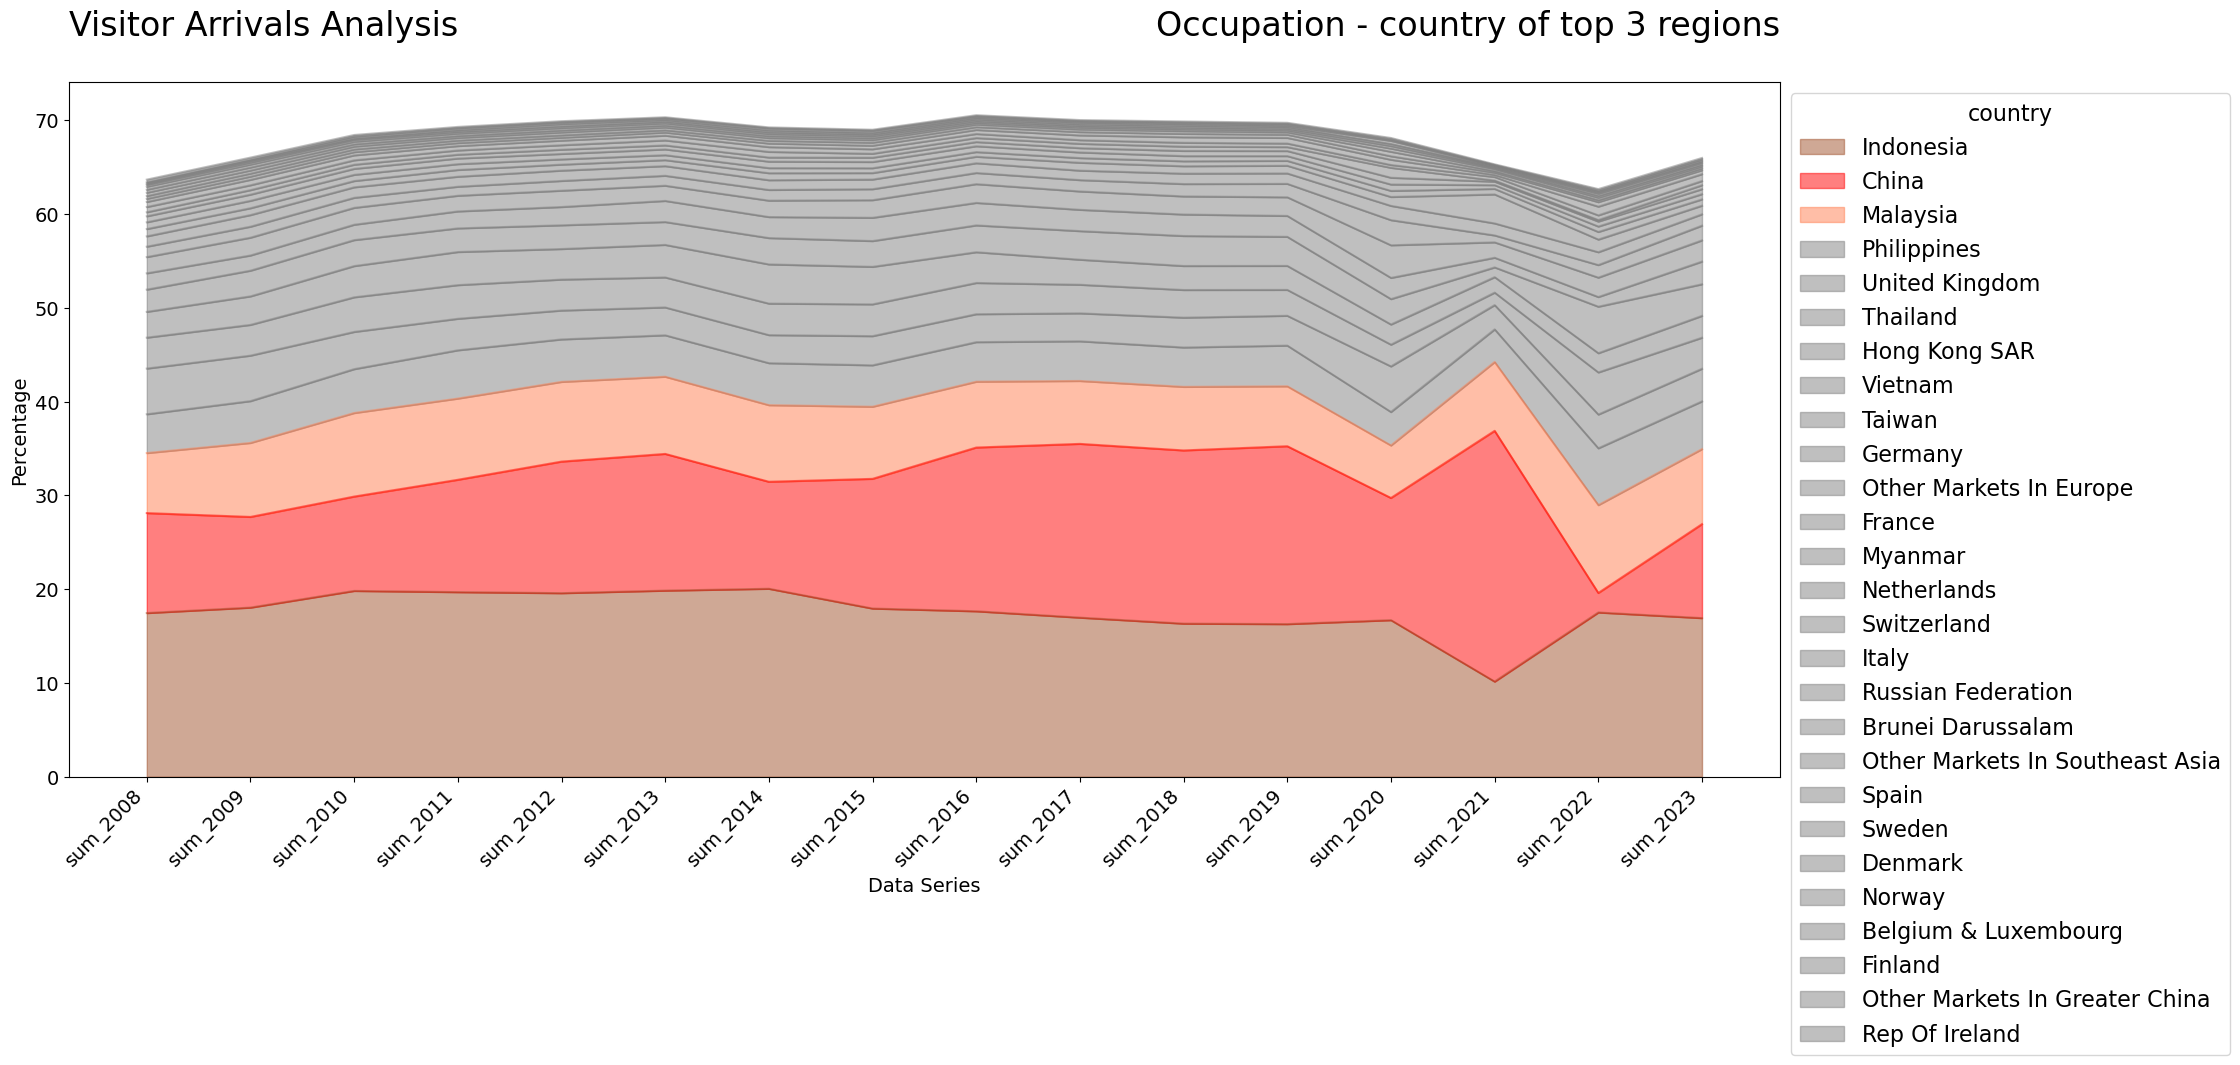

In [4]:
#plot the propotion area chart of each countries in top 3 regions.

##1. prepare the data we want to analyze
df_analyze_copy1 = df_analyze.copy()

#1-1. pick coutries of top 3 regions
continent = ['Southeast Asia','Greater China','North Asia','South Asia','West Asia','Americas','Europe','Oceania','Africa','Others']
country = []
for column in df_analyze_copy1.columns:
    if column not in continent and column != 'Total':
        country.append(column)

SEA = ['Brunei Darussalam','Indonesia','Malaysia','Myanmar','Philippines','Thailand','Vietnam','Other Markets In Southeast Asia']
GC = ['China','Hong Kong SAR','Taiwan','Other Markets In Greater China']
E = ['Belgium & Luxembourg','Denmark','Finland','France','Germany','Italy','Netherlands','Norway','Rep Of Ireland','Russian Federation','Spain','Sweden','Switzerland','United Kingdom','Other Markets In Europe']
SA = ['Bangladesh','India','Pakistan','Sri Lanka','Other Markets In South Asia']
analyze_country = SEA + GC + E
df_analyze_country = df_analyze_copy1.loc[:,['Total']+analyze_country]

#1-2. calculate the total number per year per country
for year in range(2008, 2024):
    start_date = pd.Timestamp(year=year, month=1, day=1)
    end_date = pd.Timestamp(year=year, month=12, day=1)
    yearly_data = df_analyze_country.loc[start_date:end_date]
    yearly_sum = yearly_data.sum(axis=0)
    df_analyze_country.loc[f'sum_{year}'] = yearly_sum

df_analyze_year_country = df_analyze_country.loc[f'sum_{2008}':f'sum_{2023}']

#1-3. calculate the propotion per year per country and sort
for coun in analyze_country:
    for year in range(2008, 2024): 
        population_country = df_analyze_year_country.loc[f'sum_{year}',coun]
        total_population = df_analyze_year_country.loc[f'sum_{year}','Total']
        yearly_pct_country = round(population_country/total_population * 100,2)
        df_analyze_year_country.loc[f'sum_{year}',coun] = yearly_pct_country

df_analyze_pct_country = df_analyze_year_country.loc[f'sum_{2008}':f'sum_{2023}']

column_totals = df_analyze_pct_country.sum(axis=0)
sorted_columns = column_totals.sort_values(ascending=False).index
df_analyze_pct_country_sorted = df_analyze_pct_country[sorted_columns]

##2. start to plot
highlight_continents = ['Indonesia', 'China', 'Malaysia']
colors = ['sienna' if country == 'Indonesia' else 'red' if country == 'China' else 'coral' if country == 'Malaysia' else 'grey' for country in df_analyze_pct_country_sorted.columns[1:]]

fig, ax = plt.subplots(figsize=(30, 10))
df_analyze_pct_country_sorted.iloc[:,1:].plot(kind='area', stacked=True, ax=ax, alpha=0.5, color=colors)
ax.set_title('Visitor Arrivals Analysis\n', loc='left',fontsize=24)
ax.set_title('Occupation - country of top 3 regions\n', loc='right',fontsize=24)
ax.legend(title='country', loc='upper left', fontsize=16, bbox_to_anchor=(1, 1), title_fontsize='16')
ax.set_xlabel('Data Series', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
xticks = range(len(df_analyze_pct_country.index))
ax.set_xticks(xticks)
xticklabels = [f'sum_{year}' for year in range(2008, 2024)]
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

Each layer on the chart represents the percentage of each country in top 3 regions. 

1. now, we can see the top 3 coutries are Indonesia, China and Malaysia.

2. why Malaysia is not number 1? we checked and found the notes says the data excludes arrivals of Malaysians by land. maybe it is one of the reason.

so based on the data we have, how far ahead are these countries? we did a box plot as below.

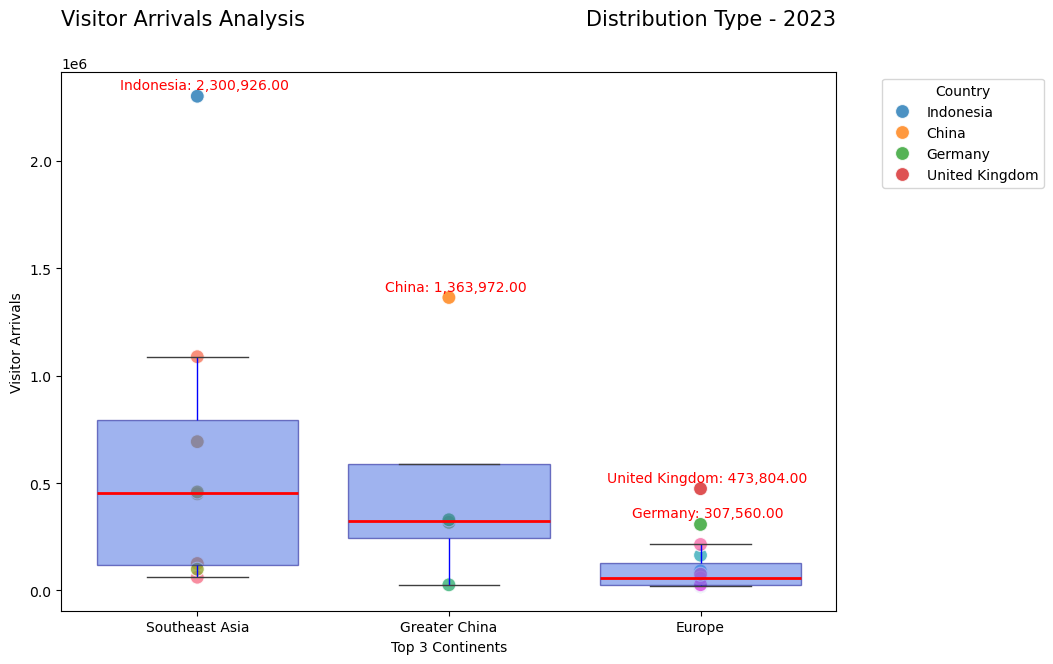

In [5]:
#plot the distribution box of each countries in top 3 regions.

##1. prepare the data
df_analyze_copy2 = df_analyze.copy()

#1-1. calculate the total number of top 3 regions in 2023 per country
continent = ['Southeast Asia','Greater China','North Asia','South Asia','West Asia','Americas','Europe','Oceania','Africa','Others']
country = []
for column in df_analyze_copy2.columns:
    if column not in continent and column != 'Total':
        country.append(column)

SEA = ['Brunei Darussalam','Indonesia','Malaysia','Myanmar','Philippines','Thailand','Vietnam','Other Markets In Southeast Asia']
GC = ['China','Hong Kong SAR','Taiwan','Other Markets In Greater China']
E = ['Belgium & Luxembourg','Denmark','Finland','France','Germany','Italy','Netherlands','Norway','Rep Of Ireland','Russian Federation','Spain','Sweden','Switzerland','United Kingdom','Other Markets In Europe']
SA = ['Bangladesh','India','Pakistan','Sri Lanka','Other Markets In South Asia']
analyze_country = SEA + GC + E
df_analyze_country = df_analyze_copy2.loc[:,['Total']+analyze_country]

start_date = pd.Timestamp(year=2023, month=1, day=1)
end_date = pd.Timestamp(year=2023, month=12, day=1)
data_2023 = df_analyze_country.loc[start_date:end_date]
sum_2023 = data_2023.sum(axis=0)
df_analyze_country.loc['sum_2023'] = sum_2023
df_sum_2023 = df_analyze_country.loc[['sum_2023']]
df_sum_2023 = df_sum_2023.transpose()

SEA = ['Brunei Darussalam', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines', 'Thailand', 'Vietnam', 'Other Markets In Southeast Asia']
GC = ['China','Hong Kong SAR','Taiwan','Other Markets In Greater China']
E = ['Belgium & Luxembourg','Denmark','Finland','France','Germany','Italy','Netherlands','Norway','Rep Of Ireland','Russian Federation','Spain','Sweden','Switzerland','United Kingdom','Other Markets In Europe']

#1-2. determine the region of these countries
def determine_region(country):
    if country in SEA:
        return 'Southeast Asia'
    elif country in GC:
        return 'Greater China'
    elif country in E:
        return 'Europe'
    else:
        return 'Other'

df_sum_2023['Region'] = df_sum_2023.index.to_series().apply(determine_region)
df_sum_2023_analyze = df_sum_2023[df_sum_2023.Region != 'Other']

##2. start to plot

#2-1. create the boxplot
df_sum_2023_analyze = df_sum_2023_analyze.reset_index()
df_sum_2023_analyze.rename(columns={'Data Series': 'Country'}, inplace=True)

plt.figure(figsize=(10, 7))
ax = sns.boxplot(data=df_sum_2023_analyze, x='Region', y='sum_2023', showfliers=False,
                 boxprops=dict(edgecolor='darkblue', facecolor='royalblue', alpha=0.5),
                 whiskerprops=dict(color='blue'),
                 medianprops=dict(color='red', linewidth=2))

#2-2. create the scatter plot
def calculate_upper_whisker(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    return q3 + 1.5 * iqr
upper_whiskers = df_sum_2023_analyze.groupby('Region')['sum_2023'].apply(calculate_upper_whisker)

df_filtered = df_sum_2023_analyze.copy()
df_filtered['upper_whisker'] = df_filtered['Region'].map(upper_whiskers)
df_filtered_up = df_filtered[df_filtered['sum_2023'] >= df_filtered['upper_whisker']]
df_filtered_down = df_filtered[df_filtered['sum_2023'] < df_filtered['upper_whisker']]

scatter_plot1 = sns.scatterplot(data=df_filtered_down, x='Region', y='sum_2023', hue='Country', marker='o', s=100, alpha=0.8,legend = False)
scatter_plot2 = sns.scatterplot(data=df_filtered_up, x='Region', y='sum_2023', hue='Country',marker='o', s=100, alpha=0.8, legend=True)

#2-3. label the points
for region in upper_whiskers.index:
    upper_whisker = upper_whiskers[region]
    region_data = df_sum_2023_analyze[df_sum_2023_analyze['Region'] == region]
    for i, row in region_data.iterrows():
        if row['sum_2023'] > upper_whisker:
            ax.annotate(
                f"{row['Country']}: {row['sum_2023']:,.2f}",
                (row['Region'], row['sum_2023']),
                textcoords="offset points",
                xytext=(5, 5),  # 调整文本位置
                ha='center',
                fontsize=10,
                color='red'
            )
            
plt.title('Visitor Arrivals Analysis\n', loc='left',fontsize=15)
plt.title('Distribution Type - 2023\n', loc='right',fontsize=15)
plt.xlabel('Top 3 Continents')
plt.ylabel('Visitor Arrivals')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()



in the box plot, we plotted the number of people from each country in the top 3 regions in 2023. the red line is the median line. 

1. we can find our data distribution is primarily driven by these major data points. so these countries have a significant and irreplaceable impact on the number of visitors to Singapore.

but, have these countries always driven the growth in visitor numbers to Singapore, or did they suddenly start increasing in a particular year?

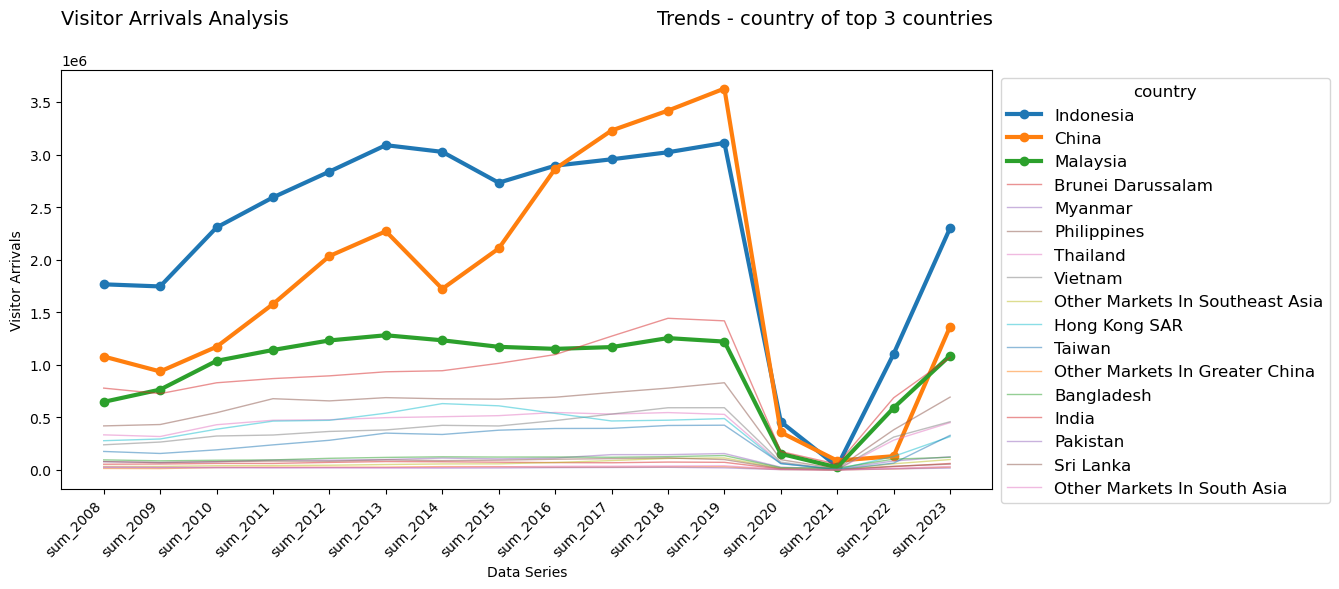

In [7]:
#plot the trend line chart of each countries in top 3 regions.

##1. prepare the data
df_analyze_copy3 = df_analyze.copy()

continent = ['Southeast Asia','Greater China','North Asia','South Asia','West Asia','Americas','Europe','Oceania','Africa','Others']
country = []
for column in df_analyze_copy3.columns:
    if column not in continent and column != 'Total':
        country.append(column)

SEA = ['Brunei Darussalam','Indonesia','Malaysia','Myanmar','Philippines','Thailand','Vietnam','Other Markets In Southeast Asia']
GC = ['China','Hong Kong SAR','Taiwan','Other Markets In Greater China']
NA = ['Japan','South Korea','Other Markets In North Asia']
SA = ['Bangladesh','India','Pakistan','Sri Lanka','Other Markets In South Asia']
analyze_country = SEA + GC + SA
df_analyze_country = df_analyze_copy3.loc[:,analyze_country]

for year in range(2008, 2024):
    start_date = pd.Timestamp(year=year, month=1, day=1)
    end_date = pd.Timestamp(year=year, month=12, day=1)
    yearly_data = df_analyze_country.loc[start_date:end_date]
    yearly_sum = yearly_data.sum(axis=0)
    df_analyze_country.loc[f'sum_{year}'] = yearly_sum

df_analyze_year_country = df_analyze_country.loc[f'sum_{2008}':f'sum_{2023}']

##2. start to plot
fig, ax = plt.subplots(figsize=(12, 6))
highlighted_lines = ['Indonesia', 'China', 'Malaysia']

for line in highlighted_lines:
    df_analyze_year_country.plot.line(ax=ax, y=line, figsize=(18, 6), linewidth=3, marker='o')
for line in df_analyze_year_country.columns:
    if line not in highlighted_lines:
        df_analyze_year_country.plot.line(ax=ax, y=line, figsize=(18, 6), linewidth=1, alpha=0.5)

ax.set_title('Visitor Arrivals Analysis\n', loc='left',fontsize=14)
ax.set_title('Trends - country of top 3 countries\n', loc='right',fontsize=14)
ax.legend(title='country',loc='upper left',fontsize=12, bbox_to_anchor=(1, 1), title_fontsize='12')
ax.set_xlabel('Data Series',fontsize=10)
ax.set_ylabel('Visitor Arrivals', fontsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
xticks = range(len(df_analyze_year_country.index))
ax.set_xticks(xticks)
xticklabels = [f'sum_{year}' for year in range(2008, 2024)]
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()


we plotted the line chart of top 3 coutries, which shows the trend clearly.

1. firsly we can see, Indeed, these three countries have always been the largest exporters to SG.

2. furtherly, we can explore that the growth rate of China is impressively strong.

3. According to this growth trend, people from these three countries may still be our main tourists in the future.

so here are some overall trends by year, does the data have any periodic patterns? let me invite our team member to introduce.
